In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


%matplotlib inline 

In [23]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
data.shape

(50, 5)

In [20]:
## getting the dummy values for categorical data. In this case , the column "State"
dummies = pd.get_dummies(data['State'])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
## dropping off the categorical column .
## These are our independent variables or say features 
X_sub = data.drop(['State'],axis=1)

##adding the dummy values column in the original data set
X = pd.concat([X_sub,dummies],axis=1)


X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   California       50 non-null     uint8  
 5   Florida          50 non-null     uint8  
 6   New York         50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [5]:
## Plotting scatter plot 

def scatter_plot(feature,target):
    plt.figure(figsize=(10,6))
    plt.scatter(data[feature],data[target])
    plt.xlabel("Startups with {}".format(feature))
    plt.ylabel("Profit")
    plt.show()

In [9]:
## Trying to observe the relationship between every feature with the target variable 

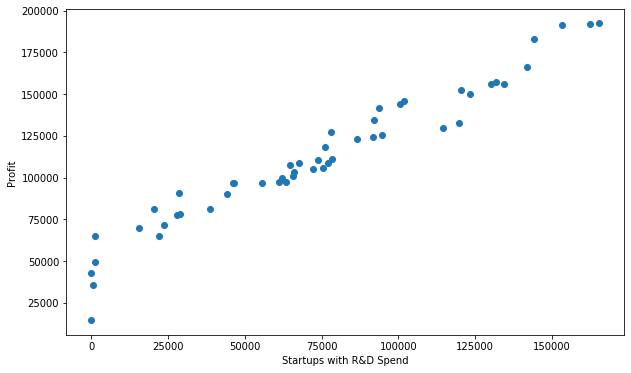

In [27]:
scatter_plot("R&D Spend",'Profit')

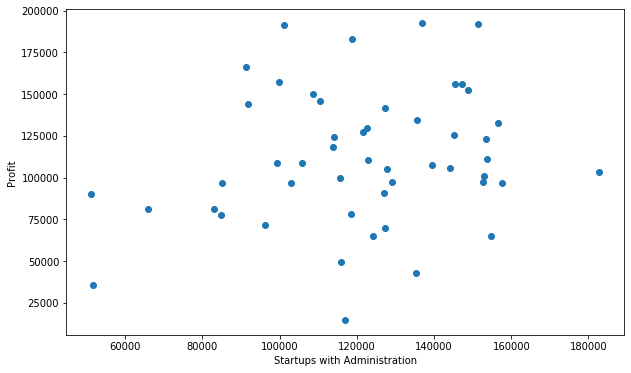

In [28]:
scatter_plot("Administration",'Profit')

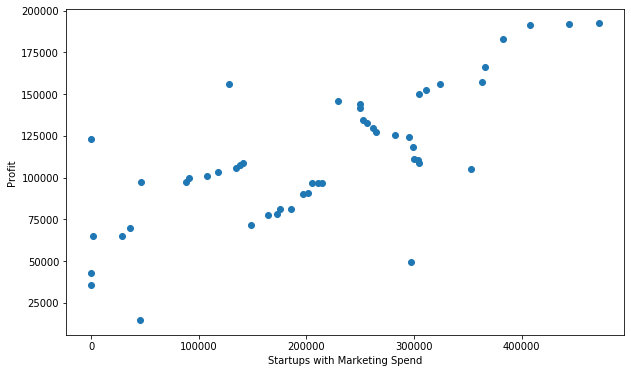

In [29]:
scatter_plot("Marketing Spend",'Profit')

In [30]:
#As you can see, R&D Spend and Marketing Spend seem to be good predictors for Profit,
# while there seems to be no correlations between administration and profit.


In [31]:
# we will try to first implement Simple Linear Regression using cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [32]:
# target variable 
y = data.iloc[:,-1].values.reshape(-1,1)

In [35]:
#The first one will allow us to fit a linear model, while the second object will perform k-fold cross-validation.Here we use 5-fold
linear_reg = LinearRegression()
MSEs = cross_val_score(linear_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_MSE = np.mean(MSEs)
print(mean_MSE)

-1.7608359135538813e-21


In [36]:
#The cross_val_score will return an array of MSE for each cross-validation steps. 
#In our case, we have five of them. Therefore, we take the mean of MSE and print it.
#You should get a negative MSE of -1.7608359135538813e-21.

In [56]:
#The Ridge() function has an alpha argument ([Math Processing Error], but with a different name!)
#that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, 
#essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:


#For ridge regression, we introduce GridSearchCV. 
#This will allow us to automatically perform 5-fold cross-validation with a range of different regularization parameters 
#in order to find the optimal value of alpha.


#here we list some values of alpha
parameters = {'alpha' : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

In [66]:
ridge = Ridge(normalize=True)
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [58]:
#we can find the best parameter and the best MSE with the following:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-5.767877471773059e-20


In [67]:
#Still ,we can see that there's no improvement than that of the linear model 
#lets go for the lasso now 
lasso = Lasso(normalize=True)
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso_regressor.fit(X,y)

#we can find the best parameter and the best MSE with the following:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 1}
-380.15287375397367


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [ ]:
## In this case , we saw that neither Lasso nor Ridge can give us the optimal values for the dataset , since the dataset had less 
# features and the data was having less no. of rows.

##But we understood how the Ridge and Lasso Regression works and how to implement this